# Random Linear Classifier with Train/Test Split

This notebook implements the random linear classifier algorithm with proper train/test data splitting.

## Key Improvements:
- Split data into training (80%) and testing (20%)
- Train algorithm only on training data
- Evaluate performance on unseen test data
- Better assessment of generalization capability

In [1]:
# Import required libraries for machine learning with train/test split
import numpy as np                                    # For mathematical operations
import matplotlib.pyplot as plt                       # For creating visualizations
from sklearn.model_selection import train_test_split  # For splitting data into train/test

In [2]:
# Set random seed for reproducible results
# This ensures we get the same 'random' numbers every time we run the code
# Very important for learning and comparing results!
np.random.seed(42)

## Data Generation

In [3]:
# Generate synthetic data for our classification problem
# Same as before, but now we'll organize it for train/test splitting

# Generate dog data (shorter whiskers, higher ear flappiness)
dog_whisker_length = np.random.normal(5, 1, 10)      # mean=5, std=1, 10 dogs
dog_ear_flappiness_index = np.random.normal(8, 1, 10) # mean=8, std=1, 10 dogs

# Generate cat data (longer whiskers, lower ear flappiness)
cat_whisker_length = np.random.normal(8, 1, 10)      # mean=8, std=1, 10 cats
cat_ear_flappiness_index = np.random.normal(5, 1, 10) # mean=5, std=1, 10 cats

# Combine all data into one big array
# Each row will be one animal: [whisker_length, ear_flappiness]
X = np.vstack([
    np.column_stack([dog_whisker_length, dog_ear_flappiness_index]),  # All dog data
    np.column_stack([cat_whisker_length, cat_ear_flappiness_index])   # All cat data
])

# Create labels (0 for dogs, 1 for cats)
# This tells us which animal each row represents
y = np.hstack([np.zeros(10), np.ones(10)])  # 10 zeros (dogs) + 10 ones (cats)

print("Total data shape:", X.shape)  # Should be (20, 2) = 20 animals, 2 features each
print("Labels shape:", y.shape)      # Should be (20,) = 20 labels
print("Labels:", y)                  # Should show: [0 0 0... 1 1 1...]

Total data shape: (20, 2)
Labels shape: (20,)
Labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Train/Test Split

In [4]:
# Split data into training and testing sets
# This is the KEY difference from our first notebook!
# We're holding back some data to test our final model
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                    # Our data and labels
    test_size=0.2,          # Use 20% for testing, 80% for training
    random_state=42         # For reproducible splits
)

print("Training data shape:", X_train.shape)  # Should be (16, 2) = 16 animals for training
print("Testing data shape:", X_test.shape)    # Should be (4, 2) = 4 animals for testing
print("Training labels:", y_train)            # Labels for training animals
print("Testing labels:", y_test)              # Labels for testing animals
print("\n📊 We'll train on", len(X_train), "animals and test on", len(X_test), "animals")

Training data shape: (16, 2)
Testing data shape: (4, 2)
Training labels: [0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.]
Testing labels: [0. 1. 1. 0.]

📊 We'll train on 16 animals and test on 4 animals


In [5]:
# Separate training data by class
train_dogs = X_train[y_train == 0]
train_cats = X_train[y_train == 1]

# Separate test data by class
test_dogs = X_test[y_test == 0]
test_cats = X_test[y_test == 1]

print(f"Training dogs: {train_dogs.shape[0]}, Training cats: {train_cats.shape[0]}")
print(f"Test dogs: {test_dogs.shape[0]}, Test cats: {test_cats.shape[0]}")

Training dogs: 8, Training cats: 8
Test dogs: 2, Test cats: 2


## Visualize Train/Test Split

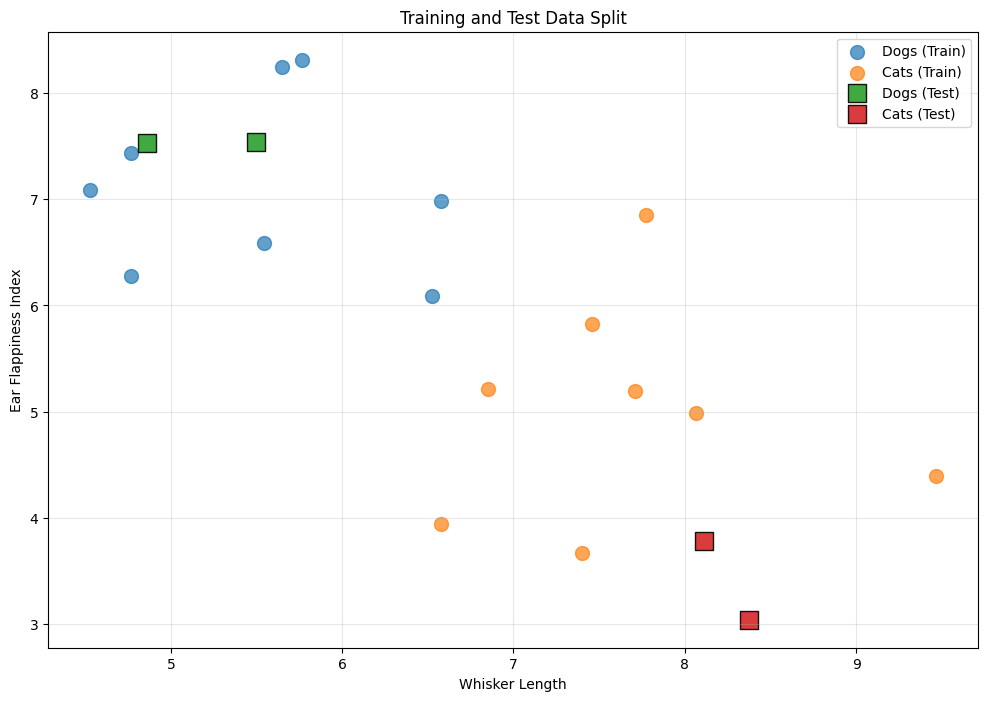

In [6]:
# Plot training and test data
plt.figure(figsize=(12, 8))

# Training data
plt.scatter(train_dogs[:, 0], train_dogs[:, 1], 
           label='Dogs (Train)', alpha=0.7, s=100, marker='o')
plt.scatter(train_cats[:, 0], train_cats[:, 1], 
           label='Cats (Train)', alpha=0.7, s=100, marker='o')

# Test data
plt.scatter(test_dogs[:, 0], test_dogs[:, 1], 
           label='Dogs (Test)', alpha=0.9, s=150, marker='s', edgecolors='black')
plt.scatter(test_cats[:, 0], test_cats[:, 1], 
           label='Cats (Test)', alpha=0.9, s=150, marker='s', edgecolors='black')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Training and Test Data Split')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Algorithm Implementation

In [7]:
def compute_error(theta, theta_0, dog_data, cat_data):
    """
    Compute training error for given hypothesis parameters.
    """
    error = 0
    
    # Check errors for dog data (should predict +1)
    for i in range(dog_data.shape[0]):
        if np.dot(theta, dog_data[i]) + theta_0 < 0:
            error += 1
    
    # Check errors for cat data (should predict -1)
    for i in range(cat_data.shape[0]):
        if np.dot(theta, cat_data[i]) + theta_0 > 0:
            error += 1
            
    return error

def random_linear_classifier(dog_data, cat_data, k, d):
    """
    Random Linear Classifier Algorithm
    """
    best_error = float('inf')
    best_theta = None
    best_theta_0 = None
    
    for i in range(k):
        theta = np.random.normal(0, 1, d)
        theta_0 = np.random.normal(0, 1)
        
        current_error = compute_error(theta, theta_0, dog_data, cat_data)
        
        if current_error < best_error:
            best_error = current_error
            best_theta = theta.copy()
            best_theta_0 = theta_0
    
    return best_theta, best_theta_0

## Train the Model

In [8]:
# Train on training data only
K = 100
D = 2

best_theta, best_theta_0 = random_linear_classifier(train_dogs, train_cats, K, D)

print("Best theta (θ₁, θ₂):", best_theta)
print("Best theta_0 (θ₀):", best_theta_0)

Best theta (θ₁, θ₂): [-0.676922    0.61167629]
Best theta_0 (θ₀): 1.030999522495951


## Evaluate Performance

In [9]:
# Calculate training error
training_error = compute_error(best_theta, best_theta_0, train_dogs, train_cats)
training_accuracy = (len(train_dogs) + len(train_cats) - training_error) / (len(train_dogs) + len(train_cats)) * 100

print(f"Training Error: {training_error}")
print(f"Training Accuracy: {training_accuracy:.1f}%")

Training Error: 0
Training Accuracy: 100.0%


In [10]:
# Calculate test error
test_error = compute_error(best_theta, best_theta_0, test_dogs, test_cats)
test_accuracy = (len(test_dogs) + len(test_cats) - test_error) / (len(test_dogs) + len(test_cats)) * 100

print(f"Test Error: {test_error}")
print(f"Test Accuracy: {test_accuracy:.1f}%")

Test Error: 0
Test Accuracy: 100.0%


## Visualize Results

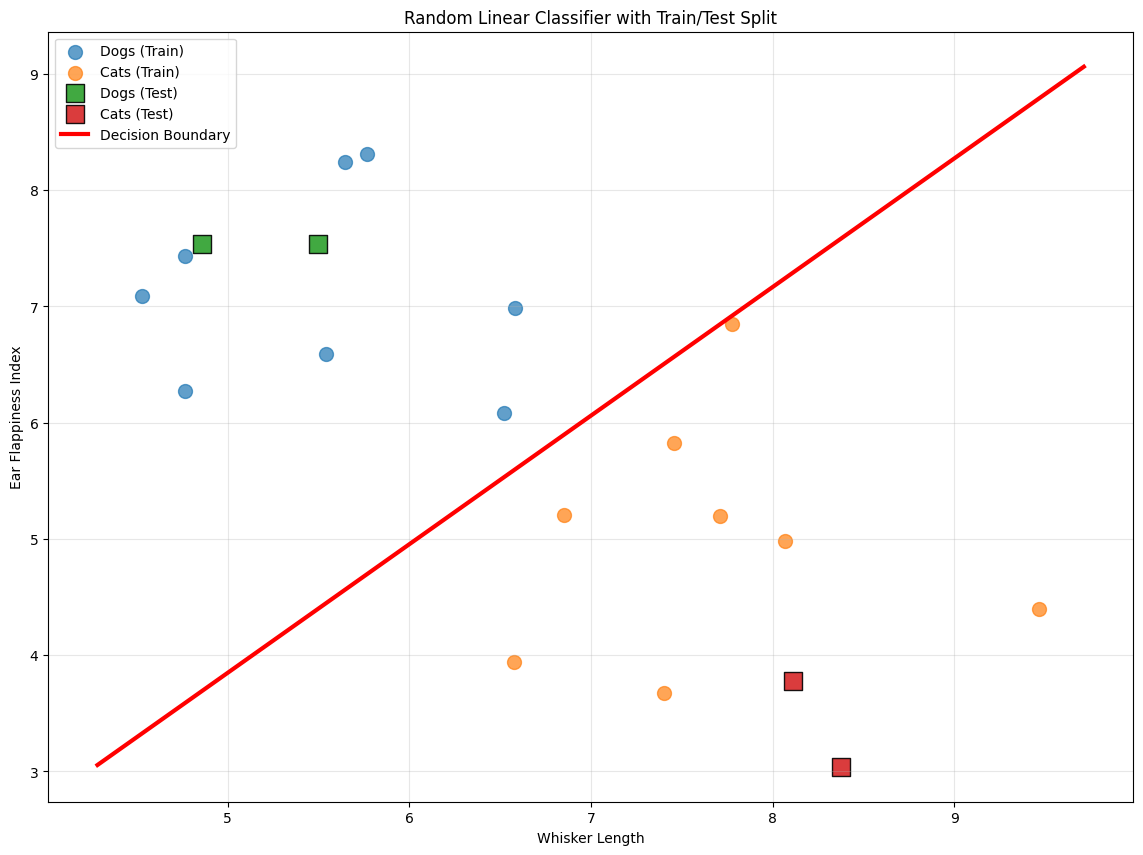

Decision boundary: -0.677x₁ + 0.612x₂ + 1.031 = 0


In [11]:
# Plot results with decision boundary
plt.figure(figsize=(14, 10))

# Training data
plt.scatter(train_dogs[:, 0], train_dogs[:, 1], 
           label='Dogs (Train)', alpha=0.7, s=100, marker='o')
plt.scatter(train_cats[:, 0], train_cats[:, 1], 
           label='Cats (Train)', alpha=0.7, s=100, marker='o')

# Test data
plt.scatter(test_dogs[:, 0], test_dogs[:, 1], 
           label='Dogs (Test)', alpha=0.9, s=150, marker='s', edgecolors='black')
plt.scatter(test_cats[:, 0], test_cats[:, 1], 
           label='Cats (Test)', alpha=0.9, s=150, marker='s', edgecolors='black')

# Decision boundary
x_min, x_max = plt.xlim()
x_line = np.linspace(x_min, x_max, 100)
y_line = -(best_theta[0] * x_line + best_theta_0) / best_theta[1]

plt.plot(x_line, y_line, 'r-', linewidth=3, label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Random Linear Classifier with Train/Test Split')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Decision boundary: {best_theta[0]:.3f}x₁ + {best_theta[1]:.3f}x₂ + {best_theta_0:.3f} = 0")

## Test Predictions Visualization

Test Dogs - Actual: +1, Predicted: [1, 1]
Test Cats - Actual: -1, Predicted: [-1, -1]


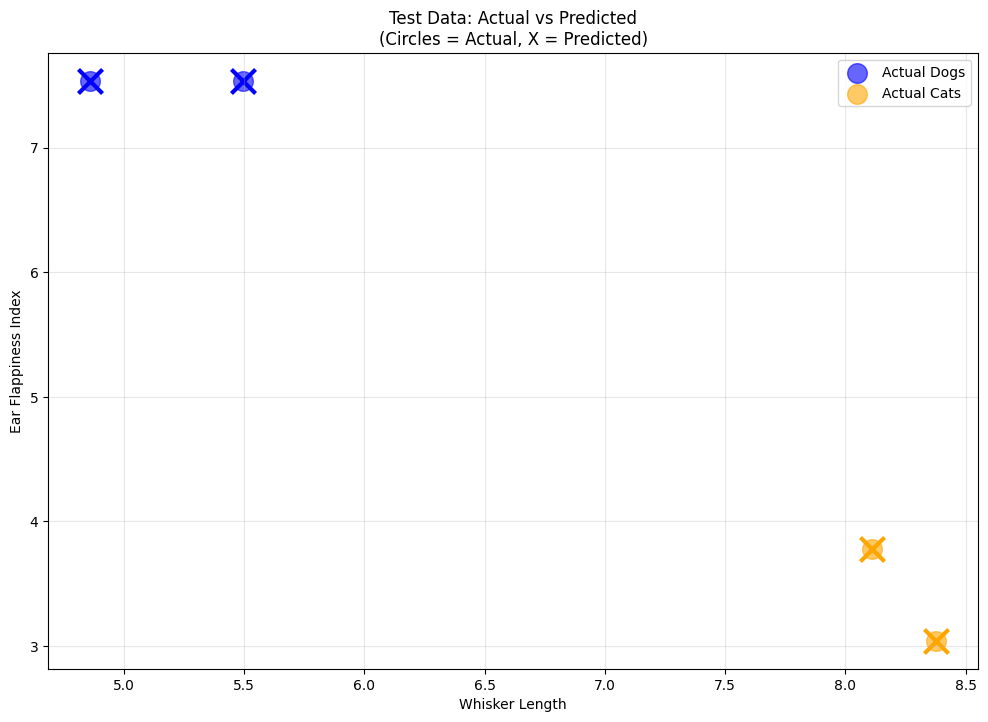


Note: Blue X = Predicted Dog, Orange X = Predicted Cat, Red X = Wrong Prediction


In [12]:
# Make predictions on test data
def predict(theta, theta_0, data_point):
    """Predict class for a single data point"""
    return 1 if np.dot(theta, data_point) + theta_0 > 0 else -1

# Get predictions for test data
test_predictions_dogs = [predict(best_theta, best_theta_0, point) for point in test_dogs]
test_predictions_cats = [predict(best_theta, best_theta_0, point) for point in test_cats]

print("Test Dogs - Actual: +1, Predicted:", test_predictions_dogs)
print("Test Cats - Actual: -1, Predicted:", test_predictions_cats)

# Visualize predictions vs actual
plt.figure(figsize=(12, 8))

# Actual test data
plt.scatter(test_dogs[:, 0], test_dogs[:, 1], 
           label='Actual Dogs', s=200, marker='o', alpha=0.6, color='blue')
plt.scatter(test_cats[:, 0], test_cats[:, 1], 
           label='Actual Cats', s=200, marker='o', alpha=0.6, color='orange')

# Predicted classes (using X marks)
for i, point in enumerate(test_dogs):
    color = 'blue' if test_predictions_dogs[i] == 1 else 'red'
    plt.scatter(point[0], point[1], marker='x', s=300, color=color, linewidth=3)

for i, point in enumerate(test_cats):
    color = 'orange' if test_predictions_cats[i] == -1 else 'red'
    plt.scatter(point[0], point[1], marker='x', s=300, color=color, linewidth=3)

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Test Data: Actual vs Predicted\n(Circles = Actual, X = Predicted)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nNote: Blue X = Predicted Dog, Orange X = Predicted Cat, Red X = Wrong Prediction")